###  Python Foundations Chapter 8:

[Back to Main Page](0_main_page.ipynb)

<h1> <center> Python Data Analysis: Mixed Martial Arts, Gender & Head Trauma </center> </h1> 

Page will consolidate what we have learned by analysing some real data:

* Importing the data
* Cleaning the data
* Analysing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# data from https://www.kaggle.com/mdabbert/ultimate-ufc-dataset

# using the dataset on the results of mixed martial arts fights, I want to investigate the following question:

# 'Is mixed martial arts more dangerous, with regard to serious head trauma, for males or females?'

# see also (about head trauma in mixed martial arts generally): https://journals.sagepub.com/doi/full/10.1177/1460408617740902 

df_orig = pd.read_csv('ufc-master.csv')

df_orig.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (79,80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
0,Alistair Overeem,Alexander Volkov,150,-182,150.000000,54.945055,2/6/2021,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cory Sandhagen,Frankie Edgar,-400,300,25.000000,300.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alexandre Pantoja,Manel Kape,-125,100,80.000000,100.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Diego Ferreira,Beneil Dariush,-125,105,80.000000,105.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Michael Johnson,Clay Guida,-225,175,44.444444,175.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# checking the columns mentioned in the warning above (I'm not interested in them, so not investigating further)
df_orig.iloc[:, 79:81]

,B_match_weightclass_rank,R_match_weightclass_rank
0,6,5
1,4,2
2,NaN,5
3,13,10
4,NaN,NaN
...,...,...
4561,NaN,NaN
4562,NaN,NaN
4563,NaN,NaN
4564,NaN,NaN


In [3]:
# seeing what variables are in the dataset

print(len(df_orig.columns))
df_orig.columns

137


Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'R_ev', 'B_ev', 'date',
       'location', 'country', 'Winner',
       ...
       'R_td_attempted_bout', 'B_td_attempted_bout', 'R_td_pct_bout',
       'B_td_pct_bout', 'R_sub_attempts_bout', 'B_sub_attempts_bout',
       'R_pass_bout', 'B_pass_bout', 'R_rev_bout', 'B_rev_bout'],
      dtype='object', length=137)

In [4]:
# overcoming the truncation

for i in df_orig.columns:
    print(i)

R_fighter
B_fighter
R_odds
B_odds
R_ev
B_ev
date
location
country
Winner
title_bout
weight_class
gender
no_of_rounds
B_current_lose_streak
B_current_win_streak
B_draw
B_avg_SIG_STR_landed
B_avg_SIG_STR_pct
B_avg_SUB_ATT
B_avg_TD_landed
B_avg_TD_pct
B_longest_win_streak
B_losses
B_total_rounds_fought
B_total_title_bouts
B_win_by_Decision_Majority
B_win_by_Decision_Split
B_win_by_Decision_Unanimous
B_win_by_KO/TKO
B_win_by_Submission
B_win_by_TKO_Doctor_Stoppage
B_wins
B_Stance
B_Height_cms
B_Reach_cms
B_Weight_lbs
R_current_lose_streak
R_current_win_streak
R_draw
R_avg_SIG_STR_landed
R_avg_SIG_STR_pct
R_avg_SUB_ATT
R_avg_TD_landed
R_avg_TD_pct
R_longest_win_streak
R_losses
R_total_rounds_fought
R_total_title_bouts
R_win_by_Decision_Majority
R_win_by_Decision_Split
R_win_by_Decision_Unanimous
R_win_by_KO/TKO
R_win_by_Submission
R_win_by_TKO_Doctor_Stoppage
R_wins
R_Stance
R_Height_cms
R_Reach_cms
R_Weight_lbs
R_age
B_age
lose_streak_dif
win_streak_dif
longest_win_streak_dif
win_dif
loss_

In [5]:
# I'm interested in whether the risk of knockout/technical knockout is greater for males or females in mixed martial arts
# contests. Subsetting by gender and finish type (for now)

df = df_orig[['gender','finish']].copy()

df = df.dropna()
        
df

,gender,finish
211,MALE,U-DEC
212,MALE,U-DEC
213,FEMALE,U-DEC
214,MALE,U-DEC
215,MALE,U-DEC
...,...,...
4561,MALE,KO/TKO
4562,MALE,KO/TKO
4563,MALE,KO/TKO
4564,MALE,U-DEC


In [6]:
female = df[df['gender'] == 'FEMALE'].copy()

display(female)

male = df[df['gender'] == 'MALE'].copy()

display(male)

,gender,finish
213,FEMALE,U-DEC
216,FEMALE,SUB
219,FEMALE,SUB
223,FEMALE,KO/TKO
225,FEMALE,U-DEC
...,...,...
3542,FEMALE,S-DEC
3559,FEMALE,U-DEC
3610,FEMALE,KO/TKO
3628,FEMALE,KO/TKO


,gender,finish
211,MALE,U-DEC
212,MALE,U-DEC
214,MALE,U-DEC
215,MALE,U-DEC
217,MALE,U-DEC
...,...,...
4561,MALE,KO/TKO
4562,MALE,KO/TKO
4563,MALE,KO/TKO
4564,MALE,U-DEC


In [7]:
# calculating the proportion of contests ending via knockout, regardless of gender
crude_ko_proportion = np.count_nonzero(df['finish'] == 'KO/TKO')/len(df)

print('Contests ended in (technical) knockouts', crude_ko_proportion*100, '% of the time.')

# calculating the proportion of contests ending via knockout for female contestants
female_ko_proportion = np.count_nonzero(female['finish'] == 'KO/TKO')/len(female)

print('Female contests ended in (technical) knockouts', female_ko_proportion*100, '% of the time.')

# calculating the proportion of contests ending via knockout for male contestants
male_ko_proportion = np.count_nonzero(male['finish'] == 'KO/TKO')/len(male)

print('Male contests ended in (technical) knockouts', male_ko_proportion*100, '% of the time.')

Contests ended in (technical) knockouts 31.738708110733366 % of the time.
Female contests ended in (technical) knockouts 17.41424802110818 % of the time.
Male contests ended in (technical) knockouts 33.19069269858251 % of the time.


Text(0.5, 1.0, 'Percentage of figts ending via KO or TKO')

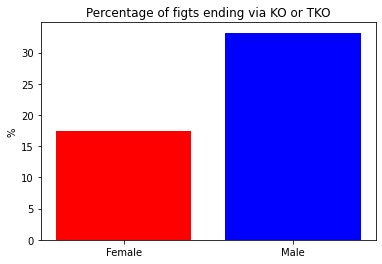

In [8]:
plt.bar(['Female', 'Male'], [female_ko_proportion*100, male_ko_proportion*100], color = ['red', 'blue'])
plt.ylabel('%')
plt.title('Percentage of figts ending via KO or TKO')

In [9]:
# calculating the risk difference
risk_difference = female_ko_proportion - male_ko_proportion
print(risk_difference)

-0.15776444677474327


In [10]:
# permutation testing the risk difference 

n_iters = 10000

df_sim = df.copy()

simulation_results = np.zeros(n_iters)

for i in np.arange(n_iters):
    
    df_sim['finish'] = np.random.permutation(df_sim['finish'])
    
    fake_female = df_sim[df_sim['gender'] == 'FEMALE']
    
    fake_male = df_sim[df_sim['gender'] == 'MALE']
    
    fake_female_ko_proportion = np.count_nonzero(fake_female['finish'] == 'KO/TKO')/len(fake_female)
    
    fake_male_ko_proportion = np.count_nonzero(fake_male['finish'] == 'KO/TKO')/len(fake_male)
    
    fake_risk_difference = fake_female_ko_proportion - fake_male_ko_proportion
    
    simulation_results[i] = fake_risk_difference


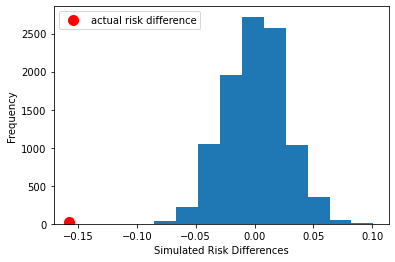

P = 0.0


In [11]:
plt.hist(simulation_results)
plt.xlabel('Simulated Risk Differences')
plt.ylabel('Frequency')
plt.plot(risk_difference, 20, 'o', markersize = 10, color = 'red', label = 'actual risk difference')
plt.legend()
plt.show()

p_value = np.count_nonzero(simulation_results >= np.abs(risk_difference))/len(simulation_results)
print('P =', p_value)

In [12]:
# does this difference remain if we factor in weight class? e.g. from inspecting the unique weight class values
# we can see that women compete in lower weight classes e.g. there is not a "Women's Heavyweight" etc. weight class. 
# Maybe the increased risk of knockout could be explained by weight, rather than gender?

df_orig['weight_class'].unique()

array(['Heavyweight', 'Bantamweight', 'Flyweight', 'Lightweight',
       'Light Heavyweight', "Women's Flyweight", 'Featherweight',
       'Middleweight', "Women's Strawweight", "Women's Bantamweight",
       'Catch Weight', 'Welterweight', "Women's Featherweight"],
      dtype=object)

In [13]:
# looking just at male and female bantamweights, to see if the risk difference in knockouts remains when weight is equal

bantamweights = df_orig[(df_orig['weight_class'] == "Women's Bantamweight") | (df_orig['weight_class'] == "Bantamweight")]

bantamweights = bantamweights[['gender', 'finish']]

bantamweights.dropna(inplace = True)

female_bantamweights = bantamweights[bantamweights['gender'] == 'FEMALE']

male_bantamweights = bantamweights[bantamweights['gender'] == 'MALE']


In [14]:
# caclulating the KO proportions for bantamweights

crude_ko_proportion_bantamweights = np.count_nonzero(bantamweights['finish'] == 'KO/TKO')/len(bantamweights)

print('Bantamweight contests ended in (technical) knockouts', crude_ko_proportion_bantamweights*100, '% of the time.')

female_ko_proportion_bantamweights = np.count_nonzero(female_bantamweights['finish'] == 'KO/TKO')/len(female_bantamweights)

print('Female bantamweight contests ended in (technical) knockouts', female_ko_proportion_bantamweights*100, '% of the time.')

male_ko_proportion_bantamweights = np.count_nonzero(male_bantamweights['finish'] == 'KO/TKO')/len(male_bantamweights)

print('Male bantamweight contests ended in (technical) knockouts', male_ko_proportion_bantamweights*100, '% of the time.')

Bantamweight contests ended in (technical) knockouts 26.277372262773724 % of the time.
Female bantamweight contests ended in (technical) knockouts 27.480916030534353 % of the time.
Male bantamweight contests ended in (technical) knockouts 25.899280575539567 % of the time.


In [15]:
bantamweight_risk_difference = female_ko_proportion_bantamweights - male_ko_proportion_bantamweights
print(bantamweight_risk_difference)

0.015816354549947842


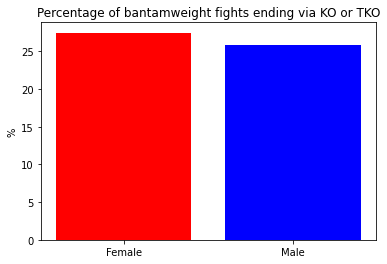

In [16]:
plt.bar(['Female', 'Male'], [female_ko_proportion_bantamweights*100, male_ko_proportion_bantamweights*100], color = ['red', 'blue'])
plt.ylabel('%')
plt.title('Percentage of bantamweight fights ending via KO or TKO')
plt.show()

In [17]:
# permutation testing the bantamweight risk difference

n_iters = 10000

bantamweights_sim = bantamweights.copy()

simulation_results = np.zeros(n_iters)

for i in np.arange(n_iters):
    
    bantamweights_sim['finish'] = np.random.permutation(bantamweights_sim['finish'])
    
    fake_female = bantamweights_sim[bantamweights_sim['gender'] == 'FEMALE']
    
    fake_male = bantamweights_sim[bantamweights_sim['gender'] == 'MALE']
    
    fake_female_ko_proportion = np.count_nonzero(fake_female['finish'] == 'KO/TKO')/len(fake_female)
    
    fake_male_ko_proportion = np.count_nonzero(fake_male['finish'] == 'KO/TKO')/len(fake_male)
    
    fake_risk_difference = fake_female_ko_proportion - fake_male_ko_proportion
    
    simulation_results[i] = fake_risk_difference

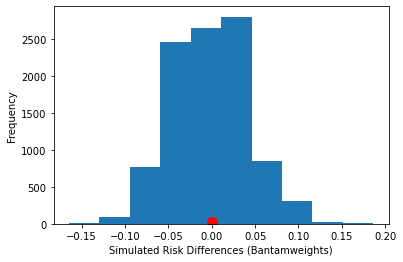

P = 0.4003


In [18]:
plt.hist(simulation_results)
plt.xlabel('Simulated Risk Differences (Bantamweights)')
plt.ylabel('Frequency')
plt.plot(bantamweight_risk_difference, 20, 20, 'o', markersize = 10, color = 'red') 
plt.show()
p_value = np.count_nonzero(simulation_results >= np.abs(bantamweight_risk_difference))/len(simulation_results)
print('P =', p_value)

On the basis of this preliminary analysis, it appears that, within the same (bantamweight) weight class, males are not significantly more likely to be knocked out than females. It is therefore possible than the risk difference observed across all weight classes (males more likely to be knocked out) is due to weight, rather than to gender.

### Question 1

Create a dataframe of just the featherweights.

In [19]:
featherweights = df_orig[(df_orig['weight_class'] == "Women's Featherweight") | (df_orig['weight_class'] == "Featherweight")]

featherweights

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
7,SeungWoo Choi,Youssef Zalal,175,-230,175.000000,43.478261,2/6/2021,"Las Vegas, Nevada, USA",USA,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Lerone Murphy,Douglas Silva de Andrade,-305,240,32.786885,240.000000,1/20/2021,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,Max Holloway,Calvin Kattar,-162,138,61.728395,138.000000,1/16/2021,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Jacob Kilburn,Austin Lingo,180,-230,180.000000,43.478261,1/16/2021,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,Cub Swanson,Daniel Pineda,132,-152,132.000000,65.789474,12/12/2020,"Las Vegas, Nevada, USA",USA,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4351,Dustin Poirier,Josh Grispi,250,-300,250.000000,33.333333,1/1/2011,"Las Vegas, Nevada, USA",USA,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4353,Mike Brown,Diego Nunes,-225,185,44.444444,185.000000,1/1/2011,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4370,Nam Phan,Leonard Garcia,165,-190,165.000000,52.631579,12/4/2010,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4372,Ian Loveland,Tyler Toner,235,-275,235.000000,36.363636,12/4/2010,"Las Vegas, Nevada, USA",USA,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
featherweights = featherweights[['gender', 'finish']].copy()

featherweights.dropna(inplace = True)

featherweights

,gender,finish
214,MALE,U-DEC
218,MALE,SUB
237,MALE,KO/TKO
238,MALE,U-DEC
257,MALE,U-DEC
...,...,...
4351,MALE,U-DEC
4353,MALE,S-DEC
4370,MALE,S-DEC
4372,MALE,U-DEC


In [21]:
female_featherweights = featherweights[featherweights['gender'] == 'FEMALE'].copy()

In [22]:
male_featherweights = featherweights[featherweights['gender'] == 'MALE'].copy()

In [23]:
# caclulating the KO proportions for bantamweights

crude_ko_proportion_featherweights = np.count_nonzero(featherweights['finish'] == 'KO/TKO')/len(featherweights)

print('Featherweight contests ended in (technical) knockouts', crude_ko_proportion_featherweights*100, '% of the time.')

female_ko_proportion_featherweights = np.count_nonzero(female_featherweights['finish'] == 'KO/TKO')/len(female_featherweights)

print('Female featherweight contests ended in (technical) knockouts', female_ko_proportion_featherweights*100, '% of the time.')

male_ko_proportion_featherweights = np.count_nonzero(male_featherweights['finish'] == 'KO/TKO')/len(male_featherweights)

print('Male featherweight contests ended in (technical) knockouts', male_ko_proportion_featherweights*100, '% of the time.')

Featherweight contests ended in (technical) knockouts 27.235772357723576 % of the time.
Female featherweight contests ended in (technical) knockouts 30.0 % of the time.
Male featherweight contests ended in (technical) knockouts 27.178423236514522 % of the time.


In [24]:
featherweight_risk_difference = female_ko_proportion_featherweights - male_ko_proportion_featherweights
print(featherweight_risk_difference)

0.028215767634854783


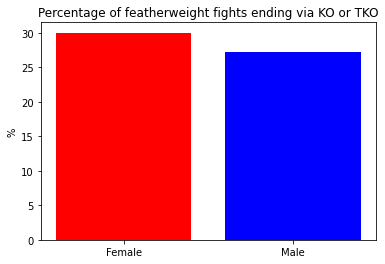

In [25]:
plt.bar(['Female', 'Male'], [female_ko_proportion_featherweights*100, male_ko_proportion_featherweights*100], color = ['red', 'blue'])
plt.ylabel('%')
plt.title('Percentage of featherweight fights ending via KO or TKO')
plt.show()

In [26]:
# permutation testing the bantamweight risk difference

n_iters = 10000

featherweights_sim = featherweights.copy()

simulation_results = np.zeros(n_iters)

for i in np.arange(n_iters):
    
    featherweights_sim['finish'] = np.random.permutation(featherweights_sim['finish'])
    
    fake_female = featherweights_sim[featherweights_sim['gender'] == 'FEMALE']
    
    fake_male = featherweights_sim[featherweights_sim['gender'] == 'MALE']
    
    fake_female_ko_proportion = np.count_nonzero(fake_female['finish'] == 'KO/TKO')/len(fake_female)
    
    fake_male_ko_proportion = np.count_nonzero(fake_male['finish'] == 'KO/TKO')/len(fake_male)
    
    fake_risk_difference = fake_female_ko_proportion - fake_male_ko_proportion
    
    simulation_results[i] = fake_risk_difference

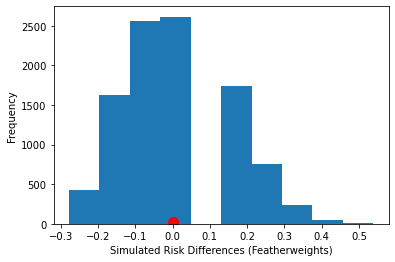

P = 0.5403


In [27]:
plt.hist(simulation_results)
plt.xlabel('Simulated Risk Differences (Featherweights)')
plt.ylabel('Frequency')
plt.plot(featherweight_risk_difference, 20, 20, 'o', markersize = 10, color = 'red') 
plt.show()
p_value = np.count_nonzero(simulation_results >= np.abs(featherweight_risk_difference))/len(simulation_results)
print('P =', p_value)

Or, you can [return to the main page](0_main_page.ipynb).

***
By [pxr687](99_about_the_author.ipynb) 